In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [2]:
data1 = pd.read_excel("附件1.xlsx")
data2 = pd.read_csv("附件2.csv",encoding='ANSI')
data3 = pd.read_excel("附件3.xlsx")
data4 = pd.read_excel("损耗率.xlsx")

In [3]:
data4

,小分类编码,小分类名称,平均损耗率(%)_小分类编码_不同值
0,1011010201,花菜类,15.51
1,1011010402,水生根茎类,13.65
2,1011010101,花叶类,12.83
3,1011010801,食用菌,9.45
4,1011010504,辣椒类,9.24
5,1011010501,茄类,6.68


In [4]:
sunhao = pd.read_csv("损耗率.csv")

# 以单品为最小单位

In [5]:
class_list = [0.0]*251
lirun_list = np.array([class_list]*1095)
chengben_list = np.array([class_list]*1095)
shuliang_list = np.array([class_list]*1095)
#tinydict = {'花叶类': 0, '花菜类':1,'水生根茎类': 2,'茄类': 3, '辣椒类': 4, '食用菌': 5}

In [7]:
time0 = datetime.datetime.strptime('2020-07-01',"%Y-%m-%d")
for i in range(len(data2)):
    if i % 10000 == 0:
        print(i)
    time_tmp = datetime.datetime.strptime(data2.iloc[i][0],"%Y-%m-%d")
    index_1 = data_timedelta = (time_tmp-time0).days
    
    index_2 = data1[data1["单品编码"] == data2.iloc[i][2]].index[0]
    
    sum_money = (data2.iloc[i,4] - data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    chengben_money = (data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    
    lirun_list[index_1][index_2] += sum_money
    chengben_list[index_1][index_2] += chengben_money
    shuliang_list[index_1][index_2] += data2.iloc[i,3]

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000


# 开始计算单品总收益

In [10]:
df_chengben_list = pd.read_csv("A3_chengben_list.csv")
del df_chengben_list["Unnamed: 0"]
df_lirun_list = pd.read_csv("A3_lirun.csv")
del df_lirun_list["Unnamed: 0"]
df_shuliang_list = pd.read_csv("A3_shuliang.csv")
del df_shuliang_list["Unnamed: 0"]

In [11]:
lirun_list = df_lirun_list.values

In [12]:
sort_sum_lirun_list = pd.DataFrame(sum(lirun_list)/1095)

In [13]:
# sort_sum_lirun_list.to_csv("D://3.1.csv")

In [14]:
shuliang_list = df_shuliang_list.values

In [15]:
sort_sum_shuliang_list = pd.DataFrame(sum(shuliang_list)/1095)

In [16]:
#sort_sum_shuliang_list.to_csv("D://3.2.csv")

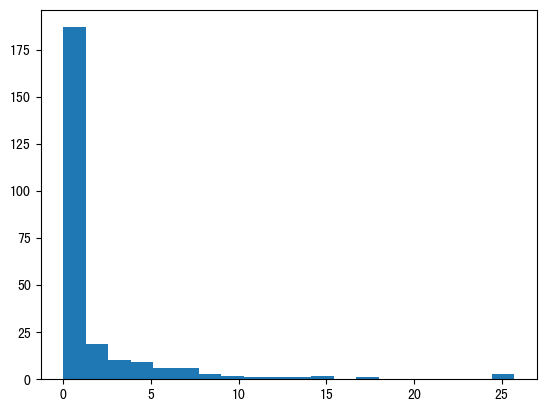

In [17]:
plt.hist(sort_sum_shuliang_list,bins =20)
plt.show()

In [18]:
danjia = sum(lirun_list)/sum(shuliang_list)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11040\2180549913.py:1: RuntimeWarning: invalid value encountered in true_divide
  danjia = sum(lirun_list)/sum(shuliang_list)


(0.0, 50.0)

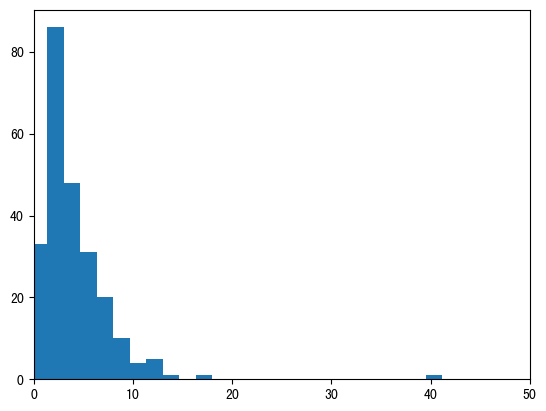

In [19]:
plt.hist(danjia,bins = 100)
plt.xlim(0,50)

In [20]:
shuliang_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 损耗率

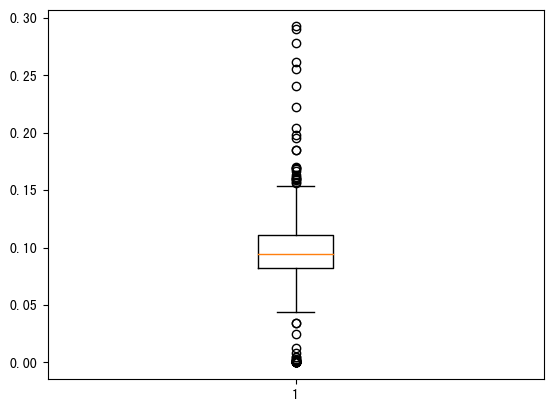

In [21]:
plt.boxplot(sunhao.iloc[:,2].values/100)
plt.show()

In [22]:
np.mean(sunhao.iloc[:,2].values/100)

0.09426693227091634

In [23]:
np.std(sunhao.iloc[:,2].values/100)

0.052006360917180146

附件4的顺序与附件1不同，做一个修正。

In [24]:
time0 = datetime.datetime.strptime('2020-07-01',"%Y-%m-%d")
for i in range(len(data2)):
    if i % 10000 == 0:
        print(i)
    time_tmp = datetime.datetime.strptime(data2.iloc[i][0],"%Y-%m-%d")
    index_1 = data_timedelta = (time_tmp-time0).days
    
    index_2 = data1[data1["单品编码"] == data2.iloc[i][2]].index[0]
    
    sum_money = (data2.iloc[i,4] - data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    chengben_money = (data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    
    lirun_list[index_1][index_2] += sum_money
    chengben_list[index_1][index_2] += chengben_money
    shuliang_list[index_1][index_2] += data2.iloc[i,3]

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000


In [25]:
sunhao_r = [0.0]*251

In [26]:
for i in range(len(sunhao)):
    index_3 = data1[data1["单品名称"] == sunhao.iloc[i,1]].index[0]
    sunhao_r[index_3] = sunhao.iloc[i,2]

In [27]:
#pd.DataFrame(sunhao_r).to_csv("D://true_sunhao.csv")

In [28]:
251-4-49

198

# 修正后的平均数量

In [29]:
dst_data = pd.read_excel('第三问过程.xlsx')

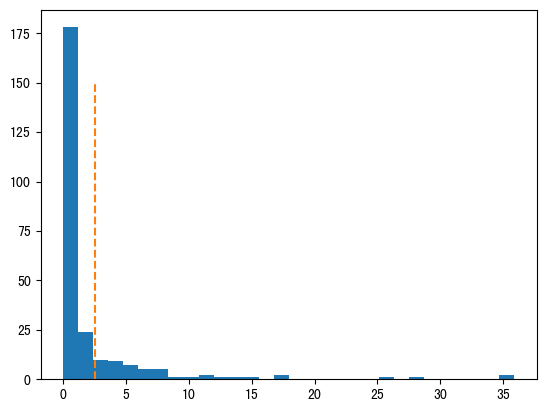

In [30]:
plt.hist(dst_data.iloc[:,6],bins = 30)
plt.plot([2.5,2.5],[0,150],'--')

# 可售单品

In [31]:
keshou_data = pd.read_excel("624_630可售.xlsx")

In [32]:
keshou_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,2023-06-24,102900005115250,15.60
1,2023-06-24,102900005115762,2.31
2,2023-06-24,102900005115779,5.75
3,2023-06-24,102900005115786,2.41
4,2023-06-24,102900005115823,4.32
...,...,...,...
349,2023-06-30,102900051000944,18.00
350,2023-06-30,102900051004294,6.45
351,2023-06-30,102900051010455,4.48
352,2023-06-30,106949711300259,1.45


In [33]:
i = 0
data1[data1["单品编码"] == keshou_data.iloc[i,1]].index[0]

179

In [34]:
keshou_r = [0] * 251

In [35]:
for i in range(len(sunhao)):
    index_3 = data1[data1["单品编码"] == keshou_data.iloc[i,1]].index[0]
    keshou_r[index_3] = 1